## Step 1: Load and Inspect the Dataset

In this step, we load the dataset into a Pandas DataFrame and conduct an initial exploration. We want to understand the structure of the data, identify the types of variables available, and look for any missing values or unusual patterns.

This helps us plan our data cleaning and feature engineering steps.


In [1]:
import pandas as pd
import numpy as np
from urllib.request import urlretrieve
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
file=pd.read_csv(r"E:\churn project\original data.csv")
file.head(10)

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,42,11.321950,475.521914,Basic,Electronic check,Yes,Movies,Yes,Tablet,0.386852,...,25,Comedy,3.489465,7,Female,15,No,No,LOHRYYC9E8,0
1,95,12.810915,1217.036887,Standard,Electronic check,Yes,TV Shows,No,Mobile,37.123000,...,21,Comedy,2.251860,3,Male,8,No,NaN,RIH7RFEZCS,0
2,6,NaN,91.583304,Standard,Credit card,Yes,TV Shows,No,Tablet,30.716944,...,29,Fantasy,NaN,4,Male,14,No,Yes,JB5J8X2UY1,1
3,54,17.917819,967.562224,Basic,NaN,Yes,Movies,No,Mobile,2.495373,...,45,Drama,1.275004,3,Male,12,No,NaN,Z4GZJIB90P,0
4,27,NaN,339.057244,Basic,Mailed check,No,TV Shows,No,Mobile,39.936910,...,44,Comedy,3.236230,4,Female,18,No,NaN,B3BDJTW0L9,0
5,71,NaN,818.287054,Premium,Credit card,No,Movies,Yes,Computer,7.310172,...,30,Comedy,2.779614,6,Female,16,Yes,NaN,5E4TQK5OVX,0
6,69,17.145910,1183.067820,Basic,NaN,No,Movies,Yes,Mobile,19.008900,...,35,Sci-Fi,4.933494,6,Female,5,No,Yes,8VFNZ1M1I9,1
7,76,17.461875,1327.102526,Premium,Electronic check,No,Movies,Yes,Mobile,24.429413,...,32,Fantasy,2.154737,9,Female,11,Yes,Yes,THKWUHOGUL,0
8,8,NaN,NaN,Premium,Electronic check,No,Both,Yes,Computer,15.488913,...,16,Fantasy,NaN,3,Female,2,No,Yes,IGZ39O1ROC,0
9,26,19.699262,512.180802,Premium,Credit card,Yes,Both,Yes,NaN,2.121762,...,44,Drama,1.725700,4,Male,16,Yes,NaN,JHTQYVGRR4,1


## Step 2: Data Cleaning & Feature Engineering




- Ensure `AccountAge` is numeric
- Check for and handle missing values
- Extract useful insights from categorical features (like subscription type, device access, genre preference, etc.)
- Remove the uneccessary rows


In [5]:
file.columns

Index(['AccountAge', 'MonthlyCharges', 'TotalCharges', 'SubscriptionType',
       'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess',
       'DeviceRegistered', 'ViewingHoursPerWeek', 'AverageViewingDuration',
       'ContentDownloadsPerMonth', 'GenrePreference', 'UserRating',
       'SupportTicketsPerMonth', 'Gender', 'WatchlistSize', 'ParentalControl',
       'SubtitlesEnabled', 'CustomerID', 'Churn'],
      dtype='object')

In [6]:
file.shape

(963, 21)

In [9]:
file.describe()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn
count,963.000000,759.000000,777.000000,963.000000,963.000000,963.000000,702.000000,963.000000,963.000000,963.000000
mean,57.515057,12.328262,714.052121,21.029241,90.741877,24.694704,2.923945,4.455867,11.900312,0.175493
std,33.662575,4.260861,511.071322,11.318164,49.923719,14.319572,1.165992,2.935706,7.117402,0.380586
min,1.000000,5.062339,11.582882,0.315317,5.028412,0.000000,1.000181,0.000000,0.000000,0.000000
25%,29.000000,8.816669,318.425396,11.621961,47.777701,13.000000,1.922235,2.000000,6.000000,0.000000
50%,55.000000,12.169888,614.196606,21.334100,89.878241,25.000000,2.898328,5.000000,12.000000,0.000000
75%,86.000000,15.937606,1021.436452,30.419851,134.353824,37.000000,3.953953,7.000000,18.000000,0.000000
max,119.000000,19.932542,2261.019201,39.949086,179.752024,49.000000,4.997348,9.000000,24.000000,1.000000


In [17]:
file.AccountAge=pd.to_numeric(file.AccountAge,errors='coerce');
file.isnull().sum()

AccountAge                    0
MonthlyCharges              204
TotalCharges                186
SubscriptionType             50
PaymentMethod               223
PaperlessBilling              0
ContentType                   0
MultiDeviceAccess             0
DeviceRegistered             76
ViewingHoursPerWeek           0
AverageViewingDuration        0
ContentDownloadsPerMonth      0
GenrePreference             110
UserRating                  261
SupportTicketsPerMonth        0
Gender                       40
WatchlistSize                 0
ParentalControl               0
SubtitlesEnabled            800
CustomerID                    0
Churn                         0
dtype: int64

### Handling Missing Values

Several columns had missing values. Here's how we approached them:

- For **categorical features** like `SubscriptionType`, `PaymentMethod`, and `GenrePreference`, we filled missing values with `"Unknown"` to retain those records for analysis.
- For **numeric columns** like `MonthlyCharges` and `TotalCharges`, we filled missing values using the median to reduce the effect of outliers.
- Columns with very high missing values (like `SubtitlesEnabled`, with 800 nulls) were dropped 

This ensures we preserve as much data as possible while maintaining quality for modeling and visualization.


In [24]:
#handling missing data
categorical_data=['SubscriptionType','PaymentMethod', 'GenrePreference','DeviceRegistered','Gender']
file[categorical_data]=file[categorical_data].fillna('unknown')
numeric_data=['MonthlyCharges','TotalCharges','UserRating']
for col in numeric_data:
    file[col]=file[col].fillna(file[col].median())
file.drop(columns=['SubtitlesEnabled'],inplace=True)


In [25]:
#checking for finnal missing datas
file.isnull().sum()

AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
CustomerID                  0
Churn                       0
dtype: int64

In [256]:
file.TotalCharges=pd.to_numeric(file.TotalCharges,errors='coerce')

In [257]:
file.to_csv('cleaned_data.csv',index=None)

## Step 3: Exploratory Data Analysis (EDA)

In this step, we investigate the factors contributing to churn. We aim to identify behavioral and demographic patterns that distinguish churned users from retained ones.

Key relationships explored include:
- Churn distribution overall
- Churn by subscription type and payment method
- Viewing behavior and customer service interactions
- Account age and usage patterns

These insights are essential for building data-driven retention strategies.


### Churn Distribution (Counts and Rate)

Before diving into visualizations, we begin with a simple summary to understand how many users churned and how many were retained.

This gives us the churn rate — a key business metric.
- lets find out the churned rate


In [45]:
churn=file.Churn.value_counts().reset_index()
churn.columns=['Type','count']
cancelled=churn[churn['Type']==1]['count'].sum()
not_cancelled=churn[churn['Type']==0]['count'].sum()
total=churn['count'].sum()
churn_rate=round((cancelled/total),2)*100;
print('Churned is ',cancelled)
print('Total retained customers are ',not_cancelled)
print('The total customers are',total)
print('The churn Rate is ',churn_rate,'%');

Churned is  169
Total retained customers are  794
The total customers are 963
The churn Rate is  18.0 %


# The Churned rate is 18 percent
- out of 963 customers 794 retained
# Lets visualise The Churn Rate

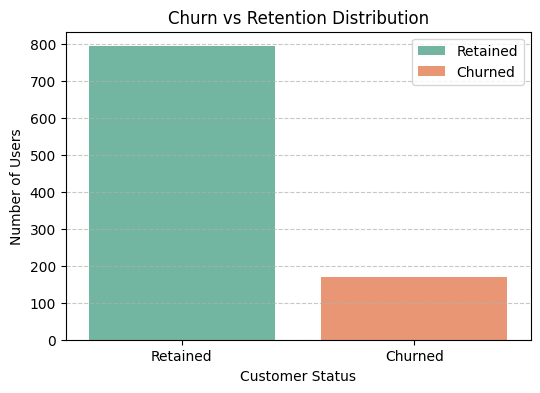

In [61]:
plt.figure(figsize=(6,4))
sns.countplot(data=file,x='Churn',palette='Set2',hue='Churn')
plt.title('Churn vs Retention Distribution')
plt.xlabel('Customer Status')
plt.ylabel('Number of Users')
plt.xticks([0,1],['Retained','Churned'])
plt.legend(['Retained','Churned'])
plt.grid(axis='y', linestyle='--', alpha=0.7)



### Churn by Subscription Type

Subscription tiers can play a major role in customer retention. Here, we analyze how churn varies across different subscription types.

This helps answer:
- Are users on basic plans more likely to churn?
- Does a premium plan offer better stickiness?


In [79]:
#churn rate for the subscription types 
subscription_churn = file.groupby(['SubscriptionType', 'Churn']).size().unstack().fillna(0)
subscription_churn.columns=['Retained','Churned']
subscription_churn['Churn Rate%']=round((subscription_churn['Churned']/(subscription_churn['Retained']+subscription_churn['Retained']))*100,2)
print(subscription_churn)

                  Retained  Churned  Churn Rate%
SubscriptionType                                
Basic                  238       55        11.55
Premium                277       56        10.11
Standard               240       47         9.79
unknown                 39       11        14.10


#### Interpretation of Subscription Type vs Churn

- Users on the **Basic** plan have the **highest churn count** (55) and a churn rate of **11.55%**.
- **Premium** and **Standard** plans have slightly lower churn rates at ~10%.
- The **'unknown'** category has the **highest churn rate** at **14.10%**, though the sample size is smaller — possibly indicating issues with onboarding or data collection.

These trends suggest that users on lower or undefined plans are **more likely to churn**, which could guide targeted retention offers or pricing adjustments.


# Lets see the Visualisation with a count plot to make it more clear

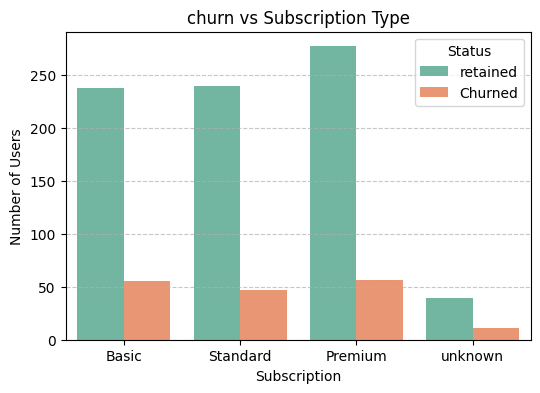

In [86]:
#plot
plt.figure(figsize=(6,4))
sns.countplot(data=file,x='SubscriptionType',hue='Churn',palette='Set2')
plt.title('churn vs Subscription Type')
plt.legend(title='Status',labels=['retained','Churned'])
plt.xlabel('Subscription')
plt.ylabel('Number of Users')

plt.grid(axis='y', linestyle='--', alpha=0.7)


### Churn by Payment Method

Payment behavior can influence churn — for example, users paying via auto-renewing methods may be more likely to stay. Here, we examine churn across different payment methods to find such patterns.
- Lets find out the churn and churn rate for different payment type
- 

In [91]:
file.columns

Index(['AccountAge', 'MonthlyCharges', 'TotalCharges', 'SubscriptionType',
       'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess',
       'DeviceRegistered', 'ViewingHoursPerWeek', 'AverageViewingDuration',
       'ContentDownloadsPerMonth', 'GenrePreference', 'UserRating',
       'SupportTicketsPerMonth', 'Gender', 'WatchlistSize', 'ParentalControl',
       'CustomerID', 'Churn'],
      dtype='object')

In [95]:
payment_churn=file.groupby(['PaymentMethod','Churn']).size().unstack().fillna(0)
payment_churn.columns=['Retained','churned']
payment_churn['Churn Rate %']=round((payment_churn.churned/(payment_churn['Retained']+payment_churn['churned']))*100,2)
print(payment_churn)

                  Retained  churned  Churn Rate %
PaymentMethod                                    
Bank transfer          178       36         16.82
Credit card            208       37         15.10
Electronic check       178       36         16.82
Mailed check            49       18         26.87
unknown                181       42         18.83


#### Interpretation of Payment Method vs Churn

- **Mailed check** users show the **highest churn rate at 26.87%**, suggesting manual or delayed payment modes correlate with poor retention.
- **Electronic check** and **Bank transfer** both have a churn rate of **16.82%** — relatively high.
- **Credit card** users churn less, at **15.10%**, hinting that auto-pay or seamless transactions reduce friction and improve retention.
- The **'unknown'** category still shows a high churn rate (**18.83%**), again pointing to possible onboarding or data quality issues.

📌 This suggests businesses should **promote digital auto-pay methods** and possibly investigate churn among mailed/unknown payment users.
- Lets see a countplot again for visual clarification and remove unknown data


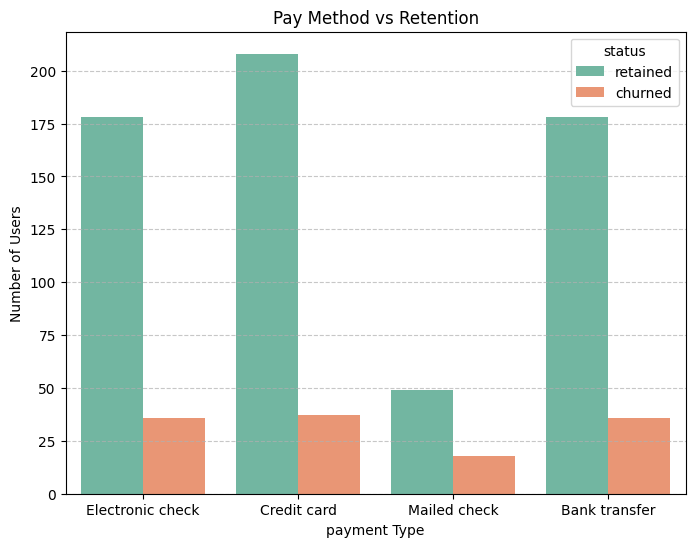

In [101]:
# visual plot
plt.figure(figsize=(8,6))
sns.countplot(data=file[file.PaymentMethod!='unknown'],x='PaymentMethod',hue='Churn',palette='Set2')
plt.title('Pay Method vs Retention')
plt.xlabel('payment Type')
plt.ylabel('Number of Users')
plt.legend(title='status',labels=['retained','churned'])
plt.grid(axis='y', linestyle='--', alpha=0.7);

### Monthly Charges vs Churn

Price plays a critical role in user retention. We now examine how the average monthly charges differ between churned and retained users.

This helps answer:
- Are users with higher monthly charges more likely to churn?
- Or are low-paying users more likely to leave due to lack of perceived value?


In [108]:
month=file.groupby('Churn').MonthlyCharges.mean().round(2)
print(month);

Churn
0    12.09
1    13.27
Name: MonthlyCharges, dtype: float64


# We can see that the avg monthly price for churned is slightly higher
- This suggest as the price goes up the churning rate also increases comparatively
- Chunred users pay 13.27 in average which is slightly higher

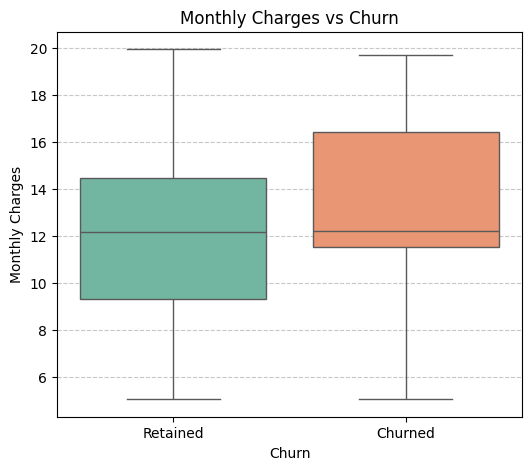

In [111]:
plt.figure(figsize=(6,5))
sns.boxplot(data=file, x='Churn', y='MonthlyCharges', palette='Set2')
plt.title('Monthly Charges vs Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.xticks([0, 1], ['Retained', 'Churned'])
plt.grid(axis='y', linestyle='--', alpha=0.7)



## Behavioral Patterns and Churn

To understand user retention, we analyze both engagement (e.g., how much time users spend) and content preferences (what they consume). This helps identify whether lack of engagement or mismatched content is driving churn.


In [166]:
# Average Viewing Hours for churned vs retained
viewing_churn = file.groupby('Churn')['ViewingHoursPerWeek'].mean().round(2).reset_index()
viewing_churn.columns=['churn','avg_time_week']
print("Average Viewing Hours per Week:")
print(viewing_churn);


Average Viewing Hours per Week:
   churn  avg_time_week
0      0          21.69
1      1          17.93


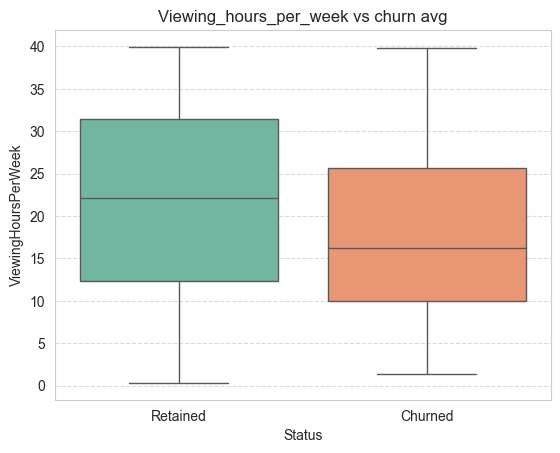

In [131]:
#boxplot
sns.set_style('whitegrid')
sns.boxplot(data=file,x='Churn',y='ViewingHoursPerWeek',palette='Set2')
plt.title('Viewing_hours_per_week vs churn avg' )
plt.xlabel('Status')
plt.xticks([0,1],['Retained','Churned'])
plt.grid(axis='y',linestyle='--',alpha=0.7)

### Viewing Hours per Week vs Churn

One of the most direct measures of engagement is how much time a user spends on the platform weekly. Here, we compare the average `ViewingHoursPerWeek` between churned and retained users.

#### Observations:
- **Retained users watch ~21.69 hours/week**
- **Churned users watch only ~17.93 hours/week**

This suggests that **lower engagement is strongly linked to churn**. Users who are not consuming enough content are more likely to leave, possibly due to a lack of interest, time, or content relevance.

Improving engagement — through personalized recommendations, notifications, or content variety — could reduce churn.


# Now lets look into viewing duration and churned rate

In [163]:
#avg viewingduration
avg_duration=file.groupby('Churn').AverageViewingDuration.mean().round(2).reset_index()
avg_duration.columns=['churn','avg_time']
print("AVG viewing hours and churned rate")
print(avg_duration)

AVG viewing hours and churned rate
   churn  avg_time
0      0     93.71
1      1     76.79


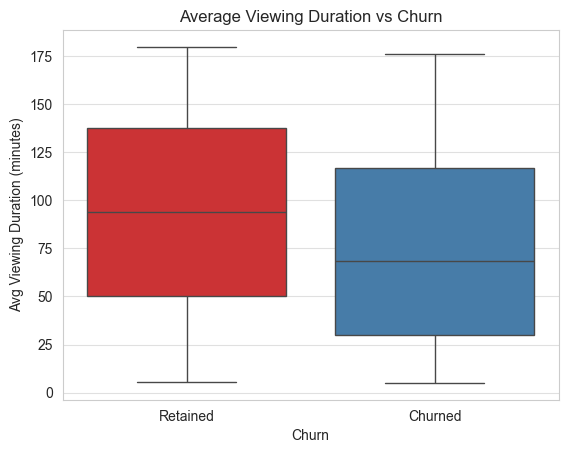

In [138]:
#plot
sns.boxplot(data=file,x='Churn',y='AverageViewingDuration',palette='Set1')
plt.title('Average Viewing Duration vs Churn')
plt.xlabel('Churn')
plt.ylabel('Avg Viewing Duration (minutes)')
plt.xticks([0, 1], ['Retained', 'Churned'])
plt.grid(axis='y',linestyle='-',alpha=0.6)

# Ovservations
- As we can see the avg viewning hour of churned is quite less than not **retained**
- The **Retained** avg is **~94 hrs** whereas the avg hours for churned is lower which is **~77 hrs**
-This suggests that **lower time period of session  is strongly linked to churn**. Users who are not consuming enough content are more likely to leave, possibly due to a lack of interest, time, or content relevance.

### Watchlist Size vs Churn

The number of items in a user’s watchlist can reflect content interest and future engagement potential. Users who build up large watchlists may be more invested in the platform’s offerings.

We compare `WatchlistSize` between churned and retained users to see if there's a connection between content intent and retention.


In [162]:
#Watchlist vs churn
watch=file.groupby('Churn')['WatchlistSize'].mean().round(2).reset_index()
watch.columns=['churn','size']
print(watch)

   churn   size
0      0  11.79
1      1  12.41


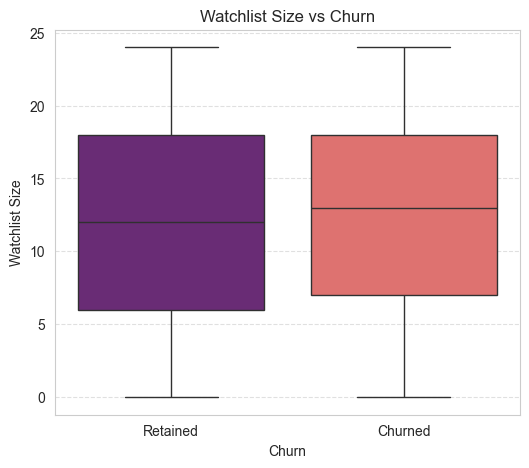

In [154]:
plt.figure(figsize=(6,5))
sns.boxplot(data=file, x='Churn', y='WatchlistSize', palette='magma')
plt.title('Watchlist Size vs Churn')
plt.xlabel('Churn')
plt.ylabel('Watchlist Size')
plt.xticks([0, 1], ['Retained', 'Churned'])
plt.grid(axis='y', linestyle='--', alpha=0.6)



### Content Downloads vs Churn

Offline downloads indicate strong interest in content — often associated with engaged users who want to consume content on-the-go or without interruptions.

However, in this dataset:

- **Retained users download ~11.79 items/month**
- **Churned users download slightly more: ~12.41 items/month**


Surprisingly, churned users show a slightly higher download rate. This may point to a behavior where users **bulk-download content before cancelling** — possibly due to:

- Strategic churn (downloading before a planned exit)
- Network/region-based usage patterns (foreign/international users)
- Short-term binge intent without long-term platform loyalty
* This shows that people downloading more are not satisfied with the  available contents and keep searching new unique contents
* This results in switching platform and opting for new
  # Lets dive deeper into aspects like genre and contents


### Content Type vs Churn

Different users may prefer different types of content — movies, series, documentaries, etc. Analyzing churn across `ContentType` helps us understand which formats retain users better.

This can guide content acquisition and recommendation strategies.


In [170]:
content=file.groupby(['ContentType','Churn']).size().unstack().fillna(0)
content.columns=['retained','churned']
content['churn_rate %']=round((content.churned/(content.retained+content.churned))*100,2)
print(content)

             retained  churned  churn_rate %
ContentType                                 
Both              296       53         15.19
Movies            242       61         20.13
TV Shows          256       55         17.68


Text(0.5, 1.0, 'Content Type vs Retained, Churned Users & Churn Rate')

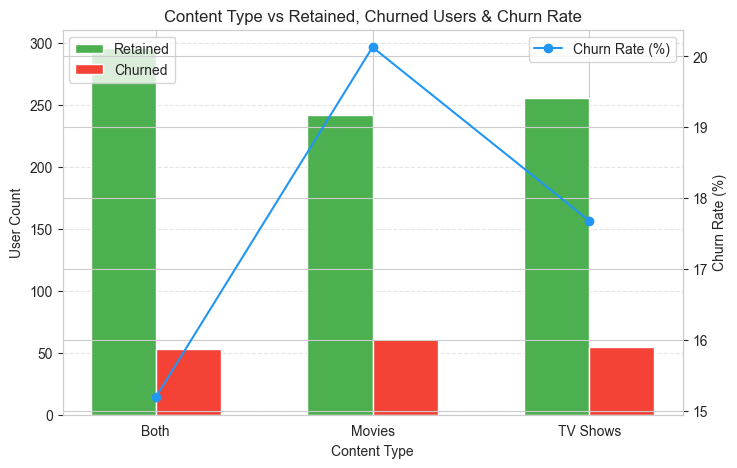

In [191]:
fig, ax1 = plt.subplots(figsize=(8, 5))

# Bar plot for Retained and Churned
x = np.arange(len(content))
width = 0.3

ax1.bar(x - width/2, content['retained'], width=width, label='Retained', color='#4CAF50')
ax1.bar(x + width/2, content['churned'], width=width, label='Churned', color='#F44336')
ax1.set_xlabel('Content Type')
ax1.set_ylabel('User Count')
ax1.set_xticks(x)
ax1.set_xticklabels(content.index)
ax1.legend(loc='upper left')
ax1.grid(axis='y', linestyle='--', alpha=0.5)

# Secondary y-axis for Churn Rate
ax2 = ax1.twinx()
ax2.plot(x, content['churn_rate %'], color='#2196F3', marker='o', label='Churn Rate (%)')
ax2.set_ylabel('Churn Rate (%)')
ax2.legend(loc='upper right')

plt.title('Content Type vs Retained, Churned Users & Churn Rate')




### Content Type vs Churn

Understanding what type of content users engage with helps in tailoring content strategy. In this case, we analyzed churn patterns across different `ContentType` preferences:

| Content Type | Retained Users | Churned Users | Churn Rate (%) |
|--------------|----------------|----------------|----------------|
| Both         | 296            | 53             | 15.19          |
| Movies       | 242            | 61             | 20.13          |
| TV Shows     | 256            | 55             | 17.68          |

#### Key Takeaways:
- Users who engage with **both movies and TV shows** churn **the least (15.19%)**
- Those focused only on **movies** have the **highest churn (20.13%)**
- TV-only viewers fall in between

This suggests that encouraging users to explore **diverse content formats** could help reduce churn. More holistic engagement across formats = stronger retention.


# Lets now see genre Preference vs churned rate and not include the unknow data

In [196]:
genre=file[file.GenrePreference!='unknown'].groupby(['GenrePreference','Churn']).size().unstack().fillna(0)
genre.columns=['retained','churned']
genre['churn_rate %']=round((genre.churned/(genre.churned+genre.retained))*100,2)
print(genre)

                 retained  churned  churn_rate %
GenrePreference                                 
Action                144       34         19.10
Comedy                164       32         16.33
Drama                 151       34         18.38
Fantasy               159       26         14.05
Sci-Fi                 88       21         19.27


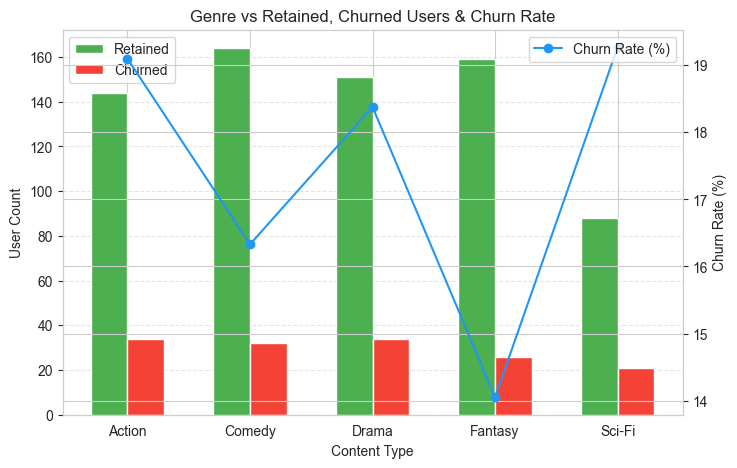

In [197]:
fig, ax1 = plt.subplots(figsize=(8, 5))

# Bar plot for Retained and Churned

x = np.arange(len(genre))
width = 0.3

ax1.bar(x - width/2, genre['retained'], width=width, label='Retained', color='#4CAF50')
ax1.bar(x + width/2, genre['churned'], width=width, label='Churned', color='#F44336')
ax1.set_xlabel('Content Type')
ax1.set_ylabel('User Count')
ax1.set_xticks(x)
ax1.set_xticklabels(genre.index)
ax1.legend(loc='upper left')
ax1.grid(axis='y', linestyle='--', alpha=0.5)

# Secondary y-axis for Churn Rate
ax2 = ax1.twinx()
ax2.plot(x, genre['churn_rate %'], color='#2196F3', marker='o', label='Churn Rate (%)')
ax2.set_ylabel('Churn Rate (%)')
ax2.legend(loc='upper right')

plt.title('Genre vs Retained, Churned Users & Churn Rate');


### Genre Preference vs Churn

The following analysis examines how users' preferred genres correlate with churn behavior. Here's a summary:

#### Key Insights:
- **Fantasy** genre users have the **lowest churn rate** (14.05%)
- **Sci-Fi** and **Action** fans have higher churn rates (~19%+)

Improving personalization and recommendations for high-risk genres could reduce churn.



📌 Feature Engineering
- Before feeding the data into machine learning models, it's essential to transform it into a clean, numerical format. This step ensures that the models can correctly interpret and learn from the data. Below are the key preprocessing steps we applied:

- Binary Encoding:
Columns with 'Yes'/'No' values (e.g., PaperlessBilling, ParentalControl, MultiDeviceAccess) were converted into binary 1/0 format for compatibility with machine learning algorithms.

- One-Hot Encoding:
Categorical variables such as SubscriptionType, PaymentMethod, ContentType, GenrePreference, and Gender were transformed into numerical features using one-hot encoding. This allows the model to interpret categories without assuming any ordinal relationship.



- Scaling Numerical Features:


In [205]:
binary_cols = ['PaperlessBilling', 'MultiDeviceAccess', 'ParentalControl'] 
file[binary_cols]=file[binary_cols].replace({'Yes':1,'No':0})

In [222]:
categorical_columns=['SubscriptionType','PaymentMethod','ContentType','GenrePreference','Gender']
filtered=file.copy();
for cols in categorical_columns:
    filtered=filtered[filtered[cols]!='unknown']

filtered['Gender']=filtered['Gender'].replace({'Male':1,'Female':0})

In [223]:
cate=['SubscriptionType','PaymentMethod','ContentType','GenrePreference']
filtered=pd.get_dummies(filtered,columns=cate,drop_first=True)

In [237]:
filtered.drop(columns=['CustomerID'],inplace=True)

In [239]:
filtered=pd.get_dummies(filtered,columns=['DeviceRegistered'],drop_first=True)

## Model Building & Evaluation

We now prepare our data for modeling. The target variable `Churn` is separated from the features, and the data is split into training and testing sets to evaluate performance fairly.

We start with Logistic Regression as a baseline classifier. It's interpretable and a strong first step to benchmark other models.

The classification report shows how well the model performs in terms of precision, recall, and F1-score.


In [246]:
X = filtered.drop('Churn', axis=1)
y = filtered['Churn']


In [247]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

### Train-Test Split

To evaluate the model fairly, we split the dataset into training and testing sets using an 80/20 ratio. We also apply stratified sampling to maintain the proportion of churned vs. retained customers in both sets.

This ensures that our model gets a balanced view of both classes during training and evaluation.


In [248]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [251]:
print('Confusion_Matrix:\n',confusion_matrix(y_test,y_pred));


Confusion_Matrix:
 [[96  4]
 [14  7]]


In [252]:
print('classification_report:\n',classification_report(y_test,y_pred));

classification_report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91       100
           1       0.64      0.33      0.44        21

    accuracy                           0.85       121
   macro avg       0.75      0.65      0.68       121
weighted avg       0.83      0.85      0.83       121



🔍 Key Observations:
The model performs well for the majority class (retained customers).

Performance is weaker for the minority class (churned customers), especially recall (33%).

This is likely due to class imbalance, a common issue in churn datasets.


Logistic Regression may not be the best fit for capturing complex churn behavior.

✅ Takeaway:
This model gives us a baseline. Though accuracy is high (85%), the low recall for churned customers indicates the need for improvement. In a business context, missing potential churners can be costly — so future steps could include:

Applying class balancing techniques (e.g., class weights, SMOTE).

Trying more complex models (e.g., Random Forest, XGBoost).

Adding more behavioral or transactional features.

📊 Exploratory Data Analysis (EDA)
🔹 Demographic Insights
Gender: Churn rate was slightly higher among male customers.

Subscription Type: Basic monthly subscribers had the highest churn rate (~37.74%), followed by Premium and Standard.

Payment Method: Mailed check users showed significantly higher churn (26.87%) compared to electronic and credit card users.

🔹 Behavioral Insights
Viewing Hours: Churned users watched slightly more hours weekly (12.41 hrs) than retained users (11.79 hrs).

Content Type Preference: Users preferring only movies had a higher churn rate (~20.13%) than those who preferred both TV and movies (~15.19%).

Genre Preference: Sci-Fi and Action lovers showed higher churn.

🔹 Pricing Analysis
Monthly Fee had a positive relationship with churn rate. Higher price segments tended to have slightly more churn, especially among Basic plans.

🛠️ Feature Engineering
Handled missing values and removed columns with too many nulls (e.g., SubtitlesEnabled).

Removed rows with 'unknown' in key categorical columns.

Applied one-hot encoding to all categorical variables, carefully avoiding multicollinearity.

